In [17]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [88]:
class Const:
     def __init__(self):
        self.n_steps = 100
        self.n_animals_max = 100
        self.n_animals_start = 10
        self.vmin = 0.01
        self.vmax = 0.05
        
        self.hp_baby = 10
        self.hp_food = 5
        self.hp_reproduct = 30 
        self.hp_leak = 1
        self.hp_birthcost = 10
        
        self.food_rate = 1
        self.eating_distance = 0.05
        self.n_food_start = 20
        self.n_food_max = 1000

In [99]:
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        hp = np.zeros(c.n_animals_max)
        hp[:c.n_animals_start] = np.random.uniform(
            low=c.hp_baby, high=c.hp_reproduct, size=c.n_animals_start)
        x = np.random.uniform(size=c.n_animals_max)
        y = np.random.uniform(size=c.n_animals_max)
        
        vx = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
    
        foodx = np.ones(c.n_food_max)*-1
        foodx[:c.n_food_start] = np.random.uniform(size=c.n_food_start)
        foody = np.random.uniform(size=c.n_food_max)
        
        n_animals = np.zeros(c.n_steps)
        
        if show_dotses: # Plotting preparation
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots actually, just creating axes
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy

            # Reflect from the walls
            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
            
            for i_animal in range(c.n_animals_max):
                if hp[i_animal]<=0:
                    continue
                # for i_food in range(c.n_food_max):
                #   d = np.sqrt((x[i_animal]-foodx[i_food])**2+(y[i_animal]-foody[i_food])**2)
                #   if d < c.eating_distance:                     
                #       hp += c.hp.food
                #       foodx[i_food] = -1
                d = np.sqrt((x[i_animal]-foodx)**2 + (y[i_animal]-foody)**2)
                print(d)
                eaten_food = d < c.eating_distance
                foodx[eaten_food] = -1
                hp[i_animal] += c.hp_food*sum(eaten_food)
                
            potential_cabbage = np.argwhere(foodx<0)
            if potential_cabbage.size !=0:
                foodx[potential_cabbage[0]] = np.random.uniform()
                foody[potential_cabbage[0]] = np.random.uniform()
                
            
            hp -= c.hp_leak
            n_animals[t] = np.sum(hp>0)
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[hp>0], y[hp>0], 'r.',markersize=5);
                plt.plot(foodx,foody,'g.',markersize=1)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
        # The time loop is over

        history[:,i_trial] = n_animals
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>

[0.65637198 0.46202697 0.3547233  0.77584339 0.44516102 0.97302465
 0.90964593 0.46211292 0.69255967 0.40209173 0.9534055  0.83283907
 0.2910411  0.87848381 0.35259126 1.02473572 0.69413663 0.86541972
 0.7738892  0.56429868 1.27811817 1.2875245  1.30229003 1.48738678
 1.31563961 1.53418401 1.30696616 1.27066033 1.56779018 1.48412992
 1.27334178 1.30123822 1.39922998 1.33185253 1.28080857 1.27079286
 1.37240871 1.48204403 1.329897   1.27383511 1.42183231 1.27080111
 1.27069383 1.4768485  1.27919779 1.43044206 1.36507965 1.27081212
 1.49991327 1.44235881 1.56699444 1.36105417 1.44761145 1.31743947
 1.27635995 1.27167637 1.54574062 1.40189725 1.29702599 1.4292178
 1.54518967 1.39549199 1.27692006 1.31402388 1.28778146 1.45197776
 1.42493075 1.45150245 1.2779569  1.38664388 1.32031756 1.27897365
 1.2716054  1.29437636 1.38189511 1.596781   1.35659739 1.36590774
 1.39188414 1.270735   1.29988281 1.27181479 1.29882357 1.32224626
 1.29391305 1.38891915 1.31413651 1.55516959 1.34446311 1.35484

[0.6420824  0.44271999 0.33807904 0.75676797 0.4321783  0.95596685
 0.89130495 0.88940123 0.6773803  0.38359032 0.93756876 0.82228173
 0.2796198  0.85977519 0.33746924 1.50528189 0.67849679 1.53080795
 0.75623517 0.54495708 1.28834451 1.29685075 1.31060332 1.48965277
 1.32322206 1.53551561 1.31500905 1.28265432 1.56851966 1.48646577
 1.28426636 1.30961492 1.40368747 1.33867847 1.29073975 1.28250276
 1.37770308 1.48442498 1.33680843 1.28466858 1.42565838 1.28250441
 1.28250747 1.47934306 1.28930047 1.4340422  1.37062318 1.28250688
 1.50191682 1.44565795 1.5677376  1.36673894 1.45078194 1.32493195
 1.2868075  1.28299427 1.5468593  1.40627708 1.30566769 1.43284961
 1.54631836 1.40005988 1.28729402 1.32168861 1.29708709 1.45504308
 1.42867465 1.45457915 1.28820242 1.39148069 1.32766962 1.28910136
 1.28294546 1.30319517 1.38688096 1.59702964 1.36244247 1.37142261
 1.39656036 1.28249798 1.30834277 1.28309152 1.30734988 1.32950644
 1.30276378 1.39368575 1.32179546 1.55611919 1.35076801 1.3607

[0.6280663  0.4234205  0.32174229 0.73770889 0.41968998 0.61960528
 0.87300925 0.87134145 0.66242063 0.36518099 0.92186776 0.81205015
 0.26911222 0.84109738 0.3228037  1.50746205 0.66305505 1.53247387
 1.33704428 1.36663729 1.29877979 1.3063982  1.31914922 1.49216727
 1.33104378 1.53709065 1.32328716 1.29482756 1.56948834 1.48905043
 1.29538904 1.31822358 1.40839779 1.34574915 1.30088411 1.29439717
 1.38324899 1.48705494 1.34396405 1.29570162 1.42973716 1.29439233
 1.2945037  1.4820871  1.29961389 1.43789478 1.37641752 1.29438642
 1.50416765 1.449209   1.56872006 1.37267405 1.45420405 1.33266442
 1.29746068 1.29450363 1.54822    1.41090977 1.31453857 1.43673392
 1.54768914 1.40488052 1.29787472 1.32959192 1.30661417 1.45835975
 1.43267119 1.45790722 1.29865659 1.39656996 1.33526275 1.29943946
 1.2944766  1.31224122 1.39211902 1.59751357 1.3685373  1.37718838
 1.40148923 1.29444448 1.31703383 1.29456042 1.31610661 1.33700839
 1.31184137 1.39870489 1.32969303 1.55730963 1.35732062 1.3669

[0.61434242 0.40412956 0.30576236 0.71866746 0.4077415  0.60064375
 0.85476175 0.85334001 0.64769589 0.34687841 0.90630955 0.8291927
 0.25962934 0.82245247 0.30865972 1.50988806 0.64782555 1.53438301
 1.3447821  1.37305311 1.30941901 1.31616203 1.32792323 1.49492903
 1.33910056 1.53890837 1.3317961  1.30717502 1.57069578 1.49188261
 1.30670474 1.32705969 1.41335842 1.35306074 1.31123671 1.30647105
 1.3890434  1.48993259 1.35135998 1.30692918 1.4340665  1.30645984
 1.30667751 1.48507922 1.31013308 1.4419978  1.38245952 1.30644569
 1.50666464 1.45301011 1.56994137 1.37885628 1.457876   1.34063272
 1.30831447 1.3061994  1.54982209 1.41579284 1.32363402 1.44086868
 1.54930136 1.40995133 1.30865715 1.33772957 1.3163579  1.46192606
 1.43691825 1.46148495 1.30931443 1.40190892 1.34309288 1.30998296
 1.30619376 1.32150982 1.39760645 1.59823259 1.37487855 1.38320192
 1.40666809 1.30656949 1.32595146 1.30621643 1.32508918 1.34474805
 1.32114116 1.40397387 1.33782499 1.55874035 1.36411735 1.37331

[0.60093077 0.38484845 0.29019818 0.6996451  0.39638167 0.58171039
 0.8365656  0.83540065 0.63322247 0.32870041 0.89090161 0.8099494
 0.25128719 0.80384276 0.29511229 0.58268649 0.63282362 1.53653446
 1.35275358 1.37971158 1.32025725 1.32613746 1.33692086 1.49793668
 1.34738818 1.54096792 1.34053148 1.31969183 1.57214142 1.49496091
 1.3182085  1.33611874 1.41856672 1.36060935 1.32179264 1.31871946
 1.39508324 1.49305649 1.35899231 1.31834628 1.43864414 1.318702
 1.31902398 1.48831792 1.32085312 1.4463491  1.38874595 1.31867978
 1.50940657 1.45705933 1.57140098 1.3852823  1.46179591 1.34883267
 1.31936391 1.3180766  1.55166481 1.42092373 1.33294946 1.44525175
 1.55115428 1.41526961 1.31963636 1.34609731 1.3263135  1.46574019
 1.44141362 1.46531053 1.320171   1.40749474 1.35115587 1.32072694
 1.31809197 1.33099634 1.40334032 1.59918638 1.38146285 1.38946001
 1.41209421 1.31886807 1.33509112 1.31805459 1.33429305 1.35272136
 1.33065849 1.40948989 1.34618711 1.56041069 1.37115458 1.3799644

[0.58785272 0.36557873 0.27512034 0.68064342 0.78662752 0.56280805
 0.81842422 0.81752748 0.61901799 0.31066885 0.87565187 0.79071321
 1.3320979  0.78527075 0.28224733 0.57464548 0.61806584 1.53892719
 1.36095461 1.38660922 1.33128965 1.33631976 1.34613763 1.50118874
 1.35590242 1.54326833 1.34948891 1.3323732  1.57382462 1.49828381
 1.32989543 1.34539623 1.42401999 1.36839106 1.33254707 1.33113758
 1.40136532 1.4964251  1.36685707 1.32994804 1.44346772 1.33111399
 1.3315383  1.49180161 1.33176916 1.45094647 1.3952735  1.33108385
 1.51239212 1.46135459 1.57309823 1.39194876 1.4659618  1.35726008
 1.33060413 1.33013039 1.55374732 1.42629974 1.3424803  1.44988086
 1.55324703 1.42083259 1.33080749 1.35469089 1.33647623 1.46980021
 1.44615498 1.469382   1.33122143 1.41332449 1.35944759 1.33166654
 1.33016639 1.34069614 1.40931763 1.60037451 1.38828671 1.39595936
 1.41776473 1.33133542 1.34444828 1.33007004 1.34371366 1.3609242
 1.34038871 1.41525006 1.35477511 1.56231988 1.37842862 1.38685

[0.57513103 0.3463223  0.26061326 0.6616642  0.77159608 0.54393995
 0.80034134 0.79972494 0.60510139 0.29281079 0.26595172 0.77148465
 1.34488891 0.76673918 0.27016236 0.56715356 0.60357011 1.54156008
 1.36938107 1.39374245 1.34251142 1.34670423 1.35556907 1.50468362
 1.36463903 1.54580853 1.35866398 1.34521449 1.5757446  1.50184969
 1.34176075 1.35488766 1.42971541 1.37640191 1.34349524 1.34372072
 1.40788641 1.50003679 1.37495026 1.34172968 1.44853477 1.34369111
 1.34421578 1.49552858 1.34287641 1.45578757 1.40203882 1.3436532
 1.51561983 1.46589374 1.57503235 1.3988522  1.47037158 1.36591072
 1.34203034 1.34235599 1.55606864 1.43191812 1.35222199 1.45475368
 1.55557865 1.4266374  1.34216574 1.36350603 1.34684142 1.47410409
 1.45113993 1.47369733 1.34246094 1.41939517 1.36796388 1.342797
 1.34241225 1.35060464 1.41553528 1.60179647 1.39534664 1.40269662
 1.42367673 1.34396684 1.35401843 1.342258   1.35334648 1.36935245
 1.35032723 1.4212514  1.36358473 1.56446705 1.38593575 1.3939739

 1.21063909 1.23095911 1.21468969 1.22070416]
[0.50819937 0.2553511  0.44684061 0.16610987 1.71284501 0.12502664
 1.71236799 0.33232003 0.43789253 0.3513273  0.75940522 0.19107686
 1.7824213  0.28447947 0.47217586 0.63423743 0.41249672 1.71083518
 1.70056793 1.69112726 1.74300135 1.72692368 1.71222513 1.69987047
 1.70375751 1.7122558  1.70888576 1.78391561 1.72306266 1.69913992
 1.75758136 1.7130434  1.68803297 1.69685665 1.73740358 1.77640975
 1.68883749 1.69868185 1.69754097 1.75556822 1.68925218 1.77623975
 1.77910528 1.69757488 1.7406165  1.69009447 1.68958099 1.77602038
 1.70284898 1.69156535 1.72279031 1.69010172 1.69231907 1.70283732
 1.74741294 1.76667202 1.71580684 1.68809548 1.71660911 1.68996303
 1.71563349 1.68798519 1.74592436 1.70462238 1.72658934 1.69299223
 1.68953301 1.69291694 1.74337644 1.68806745 1.70145465 1.74109469
 1.76720408 1.7191242  1.68823225 1.73348751 1.69077856 1.68948406
 1.68798469 1.77778241 1.71413833 1.76568929 1.71502758 1.70058532
 1.71958873 1.68

 1.39902383 1.36165577 1.38041127 1.37040788]
[0.77644996 0.46611283 0.67095475 0.40839118 0.58271648 0.21567038
 1.55258187 0.06593174 0.30565895 0.57311979 0.83139198 0.18379834
 1.74745463 0.49857111 0.53184209 0.54548243 0.28035401 1.55227218
 1.61217884 1.58721246 1.6884162  1.66212233 1.63591087 1.55185543
 1.6190913  1.55255769 1.62948728 1.74959209 1.5557716  1.5519925
 1.7109495  1.63745148 1.56678512 1.6034804  1.67946635 1.7387954
 1.57755635 1.55209418 1.60515282 1.70789593 1.56039106 1.73854906
 1.74269037 1.55239551 1.68462652 1.55848947 1.5812408  1.73823106
 1.55156678 1.5562886  1.55567215 1.58342362 1.55546743 1.61713906
 1.69534316 1.72454388 1.55342857 1.56591555 1.64403315 1.55874339
 1.5533813  1.56806008 1.69301739 1.6208991  1.66155399 1.55485071
 1.55967524 1.554915   1.68900926 1.57135429 1.61414363 1.68538908
 1.72533038 1.64856163 1.57329295 1.56010812 1.58598245 1.58080619
 1.56935517 1.74078141 1.63949451 1.72308866 1.641139   1.61221775
 1.6493888  1.5704

 1.80361456 1.82266107 1.80850442 1.8140301 ]
[0.55085481 0.30785929 0.23373267 0.62611456 0.37430879 0.50632179
 1.55192077 0.76435142 0.57821458 0.25775913 0.2880777  0.73305287
 1.37093563 0.72980967 0.2487801  0.55390448 0.57544368 1.54754136
 1.38689372 1.40870132 1.3655043  1.36806118 1.3750582  1.51239503
 1.38276241 1.55160346 1.37764959 1.3713588  1.58029138 1.50970336
 1.36600791 1.37449455 1.44182113 1.39309514 1.36595409 1.36936377
 1.42163231 1.50798224 1.39180593 1.36581388 1.45938905 1.36932248
 1.37004208 1.50370496 1.36564584 1.46619118 1.41626896 1.36926947
 1.52279551 1.47569456 1.57960759 1.41335604 1.47991394 1.38386489
 1.36542197 1.36730417 1.56142336 1.44387055 1.37231983 1.46522057
 1.56095409 1.43896068 1.36542485 1.38178392 1.36816063 1.4834348
 1.4618305  1.48305095 1.36548845 1.43224692 1.38565347 1.3656117
 1.36739981 1.37102952 1.42867898 1.60533927 1.41016039 1.41687116
 1.43621316 1.36970368 1.37377979 1.36713298 1.3732308  1.38686862
 1.37081095 1.4339

 1.19693521 1.23652517 1.20884468 1.22018424]
[1.02742481 0.6463028  0.82862026 0.14468721 0.80168129 0.44806855
 1.21414258 0.32174609 0.18365489 0.74299432 0.75990246 0.52716031
 1.49278324 0.82694387 0.51889991 0.32938617 0.19199089 1.21423924
 1.3140179  1.27804807 1.41694137 1.38224638 1.3468997  1.2178511
 1.32370048 1.21414719 1.33809458 1.49548504 1.21514145 1.21835901
 1.44618697 1.34900226 1.24656061 1.30168488 1.40520649 1.48180928
 1.2635179  1.21870295 1.30407026 1.44224725 1.2357941  1.48149642
 1.48675115 1.21962409 1.41198122 1.23239854 1.26911919 1.48109247
 1.21621806 1.22827069 1.21508638 1.27240263 1.22664926 1.32097558
 1.42597564 1.46364405 1.2141727  1.24513851 1.35794694 1.23285953
 1.21416373 1.24862758 1.42294686 1.32621731 1.38148874 1.22538917
 1.23453041 1.22552255 1.41771646 1.25388279 1.31677997 1.41298033
 1.46465006 1.36406758 1.25692678 1.21811083 1.27622235 1.26846249
 1.2507073  1.48433028 1.35178524 1.46178157 1.35402108 1.31407268
 1.36518274 1.252

[0.53935281 0.28865936 0.2216181  0.61478088 0.35823624 0.48758084
 0.37072477 0.74679143 0.56528938 0.24066231 0.30040932 0.71385101
 1.38418258 0.71141867 0.23973159 0.54818925 0.56185628 1.55088697
 1.39597163 1.41651963 1.37726625 1.37902456 1.38510707 1.51660788
 1.3921407  1.55485553 1.38745142 1.3846531  1.58291614 1.51398741
 1.37838065 1.38460117 1.44822545 1.40176951 1.37745559 1.38241484
 1.42885036 1.51231222 1.40056035 1.37810734 1.46517094 1.38236788
 1.38318209 1.50815046 1.37729884 1.47174859 1.4237268  1.38230754
 1.52674009 1.48095144 1.58224667 1.42094932 1.48504188 1.39315999
 1.37737823 1.38001775 1.56445433 1.4501987  1.38266707 1.47080951
 1.56399547 1.44547308 1.37731655 1.39123817 1.37910556 1.48845711
 1.46753086 1.48808468 1.37726728 1.43902166 1.39481845 1.37728677
 1.38013253 1.38153692 1.43559853 1.60745858 1.41790695 1.42430148
 1.44283139 1.38280027 1.38396213 1.379811   1.38347341 1.39594827
 1.38134715 1.44067175 1.39130068 1.57232613 1.40981783 1.4167

[0.52831216 0.26948647 0.21059452 0.60385716 0.34250721 0.46889258
 0.36396082 0.72932409 0.55274217 0.22393923 0.31345592 0.69465953
 0.64863545 0.69308206 0.23195427 0.54310643 0.5486177  1.55446724
 1.40525843 1.42455894 1.38919922 1.3901719  1.395353   1.52105623
 1.40172446 1.55834206 1.39745352 1.39808987 1.58577364 1.51850696
 1.39091362 1.39490407 1.45485999 1.41065704 1.38913249 1.39561323
 1.43629388 1.51687769 1.40952712 1.39056247 1.47118566 1.39556072
 1.39646766 1.51283141 1.38912471 1.47753955 1.43140843 1.39549319
 1.53092007 1.48644266 1.58511854 1.42876538 1.49040443 1.40266153
 1.38950216 1.3928852  1.56771925 1.45675744 1.39320729 1.4766319
 1.56727082 1.45221515 1.38937705 1.40089697 1.39023474 1.49371422
 1.47346432 1.49335321 1.38921684 1.44602464 1.40419134 1.38913435
 1.39301874 1.39223504 1.44274548 1.60980863 1.42587509 1.43195579
 1.44967874 1.39604328 1.39433974 1.39264354 1.39391046 1.40523679
 1.39207366 1.44760675 1.40095421 1.57541442 1.41821936 1.42474

[0.51776237 0.25034684 0.20084166 0.59336604 0.32717125 0.45026355
 0.35812002 0.71195622 0.54059928 0.20768018 0.32713195 0.67547932
 0.63306266 0.67480428 0.22557965 0.53867391 0.5357538  0.81126306
 1.41475    1.43281553 1.40129886 1.40149882 1.40579167 1.52573802
 1.41150948 1.56206149 1.40765163 1.41166505 1.58886262 1.52325991
 1.40360251 1.40539895 1.46172162 1.41975374 1.40098041 1.40895481
 1.4439594  1.52167653 1.4187022  1.40317496 1.47743035 1.40889684
 1.40989468 1.51774563 1.40111908 1.48356131 1.43931027 1.40882227
 1.53533354 1.49216563 1.58822193 1.43680058 1.49599906 1.41236532
 1.40178943 1.40590227 1.57121665 1.46354366 1.40393616 1.48268498
 1.57077868 1.45918371 1.40160199 1.41075613 1.40154378 1.49920366
 1.47962807 1.49885404 1.40133278 1.45325257 1.41376801 1.40115006
 1.40605423 1.40311953 1.45011646 1.61238843 1.43406112 1.43983051
 1.45675198 1.40942859 1.40490828 1.40562638 1.40453762 1.41473006
 1.40298612 1.45476712 1.41080817 1.57873481 1.4268349  1.4329

[0.50773404 0.23124872 0.1925527  0.58333087 0.31228626 0.43170145
 0.35324817 0.6946953  0.52888857 0.19200309 0.34136178 0.65631137
 0.61770589 0.65659024 0.2207293  0.53490786 0.5232922  0.80165933
 0.219135   1.44128566 1.41356089 1.413001   1.41641884 1.5306511
 1.42149162 1.56601215 1.41804151 1.42537469 1.59218173 1.52824407
 1.41644314 1.41608152 1.46880714 1.42905561 1.41299504 1.42243554
 1.45184339 1.52670653 1.42808159 1.4159406  1.48390211 1.42237223
 1.42345915 1.52289086 1.41327767 1.48981108 1.4474287  1.42229076
 1.53997849 1.49811768 1.59155548 1.44505126 1.50182318 1.42226723
 1.41423576 1.41906485 1.574945   1.47055422 1.41484939 1.48896595
 1.5745175  1.46637554 1.41398711 1.42081147 1.41302836 1.50492289
 1.48601924 1.50458462 1.41361082 1.46070211 1.42354435 1.41332961
 1.41923487 1.41418608 1.45770807 1.61519686 1.44246131 1.44792205
 1.46404783 1.42295219 1.41566349 1.4187554  1.4153506  1.42442399
 1.41408023 1.46214955 1.42085837 1.58228583 1.4356606  1.44145

[0.49825866 0.81294084 0.18592355 0.57377556 0.29791987 0.41321527
 0.3493858  0.67754948 0.51763935 0.17706261 0.35607901 0.63715679
 0.60258166 0.63844539 0.21750523 0.53182243 0.51126234 0.79241369
 0.21211153 1.44996559 1.4259811  1.4246742  1.42723028 1.53579326
 1.43166676 1.57019231 1.42861897 1.43921494 1.59572953 1.53345721
 1.42943142 1.42694758 1.47611335 1.43855866 1.42517216 1.43605151
 1.45994231 1.53196542 1.43766129 1.4288553  1.49059799 1.43598296
 1.43715717 1.52826476 1.42559626 1.496286   1.45576011 1.43589472
 1.54485283 1.50429609 1.59511775 1.45351375 1.50787412 1.43236316
 1.426837   1.43236894 1.57890265 1.47778592 1.42594274 1.49547194
 1.57848564 1.47378737 1.42652823 1.43105886 1.42468424 1.51086931
 1.49263492 1.51054236 1.42604677 1.46836989 1.43351626 1.4256688
 1.43255666 1.42543045 1.46551688 1.61823274 1.45107197 1.4562268
 1.47156299 1.43661016 1.42660113 1.43202656 1.42634518 1.43431451
 1.42535174 1.46975068 1.43110069 1.58606593 1.44469262 1.450124

[0.48936835 0.80485752 0.18113652 0.56472448 0.28415073 0.3948157
 0.34656668 0.66052773 0.50688236 0.31986992 0.37122569 0.6180168
 0.58770791 0.6203758  0.21598026 0.52942954 0.49969539 0.78353883
 0.20667439 1.45885158 1.43855541 1.43651424 1.43822184 1.5411622
 1.4420308  1.57460012 1.43937989 1.45318207 1.5995045  1.53889698
 1.44256337 1.43799297 1.48363697 1.44825894 1.43750766 1.44979889
 1.46825261 1.53745085 1.44743731 1.44191505 1.49751497 1.44972522
 1.45098497 1.53386494 1.43807074 1.50298316 1.46430085 1.44963036
 1.5499544  1.5106981  1.59890722 1.46218438 1.51414918 1.44264903
 1.43958907 1.44581062 1.58308789 1.48523553 1.43721203 1.50220001
 1.58268137 1.48141589 1.43922128 1.44149421 1.43650724 1.51704023
 1.49947213 1.51672456 1.43863654 1.47625251 1.44367971 1.43816352
 1.4460157  1.43684847 1.47353945 1.62149479 1.45988935 1.46474113
 1.47929411 1.45039871 1.43771705 1.44543596 1.43751719 1.44439758
 1.43679648 1.47756715 1.44153103 1.59007348 1.45392709 1.4590008

[0.48109554 0.79716392 0.17834002 0.55620224 0.27106987 0.37651542
 0.34481638 0.64363991 0.49664959 0.33021126 0.38675136 0.59889283
 0.57310415 0.60238826 0.21619036 0.52773859 0.48862423 0.77504746
 0.20295113 0.65655103 1.45127981 1.44851703 1.44938943 1.54675556
 1.4525797  1.5792337  1.45032018 1.46727246 1.60350505 1.54456099
 1.45583508 1.44921358 1.49137471 1.45815251 1.44999748 1.46367401
 1.47677071 1.5431604  1.45740571 1.45511594 1.50465002 1.46359531
 1.46493886 1.53968892 1.45069711 1.5098996  1.47304729 1.46349394
 1.55528096 1.51732087 1.60292226 1.47105946 1.52064558 1.4531208
 1.45248802 1.45938609 1.58749892 1.49289979 1.44865318 1.5091472
 1.58710288 1.48925777 1.45206228 1.45211346 1.44849328 1.52343294
 1.50652786 1.52312849 1.45137612 1.48434654 1.45403066 1.45080976
 1.4596082  1.44843603 1.48177229 1.62498165 1.46890974 1.4734614
 1.48723782 1.46431415 1.44900714 1.45897979 1.44886253 1.45466919
 1.44841034 1.48559556 1.45214534 1.59430677 1.4633602  1.4680792

[0.4734726  0.78987141 0.17762808 0.5482335  0.25878169 0.35832964
 0.34415121 0.62689682 0.48697407 0.34134153 0.3865824  0.57978645
 0.55879156 0.58449032 0.21813051 0.52675636 0.4780833  0.76695235
 0.20103697 0.64074419 1.46415039 1.46067857 1.460729   1.55257092
 1.46330947 1.58409104 1.46143582 1.48148259 1.60772947 1.5504468
 1.46924278 1.46060538 1.49932327 1.46823547 1.46263768 1.47767324
 1.48549306 1.54909161 1.46756258 1.46845417 1.51200004 1.47758962
 1.47901528 1.54573418 1.46347141 1.51703234 1.48199579 1.47748189
 1.56083021 1.52416152 1.6071612  1.48013532 1.52736048 1.46377449
 1.46552995 1.47309165 1.59213385 1.50077542 1.46026212 1.5163105
 1.5917483  1.49730966 1.46504732 1.4629126  1.46063835 1.53004465
 1.51379906 1.52975138 1.4642616  1.49264855 1.46456515 1.46360359
 1.47333045 1.46018909 1.49021193 1.62869188 1.47812942 1.48238398
 1.49539074 1.4783529  1.46046736 1.47265433 1.46037716 1.46512539
 1.46018929 1.49383248 1.46293961 1.598764   1.47298813 1.477356

[0.46653139 0.7829912  0.17902559 0.54084274 0.24740433 0.34027674
 0.34457747 0.61031038 0.47788966 0.35318614 0.4052115  0.56069946
 0.54479308 0.56669049 0.22175532 0.5264868  0.46810842 0.75926615
 0.20098363 0.62513904 0.69239619 1.47299492 1.47223658 1.55860579
 1.47421616 1.58917012 1.47272282 1.49580905 1.61217603 1.55655187
 1.48278278 1.47216439 1.50747931 1.47850394 1.47542438 1.49179311
 1.49441606 1.55524192 1.47790401 1.48192602 1.51956192 1.49170466
 1.49321077 1.55199812 1.47638982 1.52437832 1.4911427  1.49159069
 1.56659978 1.53121713 1.61162227 1.48940829 1.53429103 1.47460615
 1.47871108 1.48692372 1.59699075 1.50885909 1.47203491 1.52368685
 1.59661567 1.5055682  1.47817263 1.47388769 1.4729385  1.53687253
 1.52128262 1.53659038 1.47728916 1.50115508 1.47527925 1.47654117
 1.48717887 1.47210369 1.49885487 1.63262394 1.48754469 1.49150524
 1.50374946 1.49251148 1.47209375 1.48645598 1.47205709 1.47576225
 1.47212936 1.50227449 1.4739099  1.6034433  1.48280707 1.4868

[0.46030276 0.77653425 0.18248407 0.53405394 0.23706897 0.32237902
 0.34609111 0.59389373 0.46943068 0.36567569 0.42390873 0.5416339
 0.53113354 0.5489983  0.22698408 0.52693101 0.45873652 0.75200141
 0.20279256 0.60975107 0.68622494 0.51683852 1.48390827 1.56485763
 1.48529586 1.59446879 1.48417729 1.51024852 1.61684287 1.56287365
 1.49645149 1.48388671 1.51583947 1.48895408 1.48835382 1.50603021
 1.50353614 1.56160875 1.48842617 1.49552789 1.5273325  1.50593703
 1.50752195 1.55847812 1.48944858 1.53193448 1.50048441 1.50581696
 1.57258724 1.53848474 1.61630362 1.49887471 1.54143431 1.48561189
 1.49202773 1.50087878 1.60206758 1.5171475  1.48396762 1.53127319
 1.60170297 1.51403    1.49143449 1.48503482 1.48538988 1.54391372
 1.52897544 1.54364263 1.49045508 1.50986268 1.48616906 1.48961875
 1.50114996 1.48417595 1.50769762 1.63677625 1.49715185 1.50082156
 1.51231057 1.50678651 1.48388238 1.50038122 1.48389844 1.48657589
 1.48422667 1.51091816 1.48505229 1.60834274 1.49281327 1.49649

[0.45481597 0.77051121 0.18788976 0.52789034 0.22791739 0.30466384
 0.34867797 0.57766132 0.4616315  0.37874639 0.44266548 0.52259213
 0.51783976 0.53142451 0.23370916 0.52808719 0.45000528 0.74517045
 0.20641483 0.59459716 0.68055029 0.50197817 0.55850099 1.57132385
 1.49654474 1.59998489 1.49579537 1.5247978  1.62172811 1.56940951
 1.5102454  1.4957685  1.5244004  1.49958209 1.5014223  1.52038125
 1.51284975 1.56818947 1.49912525 1.50925626 1.53530862 1.52028345
 1.52194558 1.56517148 1.50264404 1.53969773 1.51001729 1.52015738
 1.57879013 1.54596138 1.62120335 1.50853094 1.54878739 1.49678787
 1.5054763  1.51495344 1.60736227 1.52563729 1.49605645 1.5390664
 1.60700811 1.52269167 1.50482929 1.49635014 1.49798873 1.55116532
 1.53687436 1.55090522 1.50375573 1.51876789 1.49723076 1.50283268
 1.51524034 1.49640203 1.51673667 1.64114713 1.50694723 1.51032933
 1.52107066 1.52117472 1.49582944 1.51442666 1.49589737 1.49756248
 1.49647739 1.51976003 1.49636295 1.6134603  1.50300298 1.50634

[0.45009816 0.76493232 0.19508085 0.48490496 0.22009731 0.28716499
 0.35231443 0.56162915 0.4545261  0.39234014 0.46147447 0.50357685
 0.50494065 0.51398126 0.24180576 0.52995067 0.44195267 0.73878531
 0.21175738 0.57969564 0.67538476 0.48743612 0.5404417  1.57800182
 1.50795901 1.60571617 1.50757328 1.53945378 1.62682977 1.57615678
 1.52416113 1.50780598 1.53315874 1.51038422 1.51462623 1.53484304
 1.52235332 1.57498139 1.50999748 1.52310771 1.54348709 1.5347407
 1.53647847 1.57207549 1.51597262 1.54766495 1.51973774 1.53460877
 1.5852059  1.553644   1.62631948 1.51837335 1.55634728 1.50813031
 1.51905328 1.5291444  1.61287267 1.53432513 1.50829763 1.54706336
 1.61252894 1.53154981 1.51835351 1.50782987 1.51073135 1.55862438
 1.54497624 1.5583752  1.51718756 1.52786725 1.50846056 1.51617939
 1.5294467  1.50877822 1.52596855 1.64573484 1.5169272  1.52002496
 1.5300263  1.53567291 1.50793115 1.52858898 1.50805012 1.50871825
 1.50887781 1.52879667 1.50783809 1.61879393 1.51337249 1.51637

[0.84397744 0.92027755 0.90707945 0.3210188  0.75885705 0.55360025
 0.95411315 0.44792189 1.99221733 1.109701   1.25311353 0.31672657
 0.58855825 0.42823338 0.93008832 0.99557025 1.99205587 0.87865824
 0.89969404 0.49967311 0.88738597 0.53182092 0.34504767 0.86869416
 2.06898612 1.97669464 2.07977905 2.19740091 1.97457806 1.98359341
 2.16043514 2.0879355  2.0093349  2.05237492 2.1298454  2.18712335
 2.02295942 1.98399209 2.05418291 2.15748995 2.00028058 2.18688845
 2.19083506 1.98502786 2.13489666 1.99731195 2.02735691 2.18658518
 1.98088201 1.99358947 1.97460745 2.02991769 1.99208193 2.066938
 2.14533698 2.17350008 1.97575877 2.00816269 2.09461423 1.99771929
 1.97579828 2.01102856 2.14307659 2.0708763  2.11216844 1.99088761
 1.99918398 1.99101509 2.13917423 2.01528776 2.06378068 2.13564174
 2.17425375 2.09918067 2.01772847 1.97414227 2.03288301 2.02684332
 2.01272165 2.18901651 2.09001426 2.17210498 2.09168379 2.06174073
 2.10001241 2.01415763 2.0707429  1.9751594  2.04173345 2.034089

[0.8712588  0.94071338 0.93854149 0.35293786 0.78968317 0.58513921
 0.98401852 0.47241126 0.85625106 1.14091046 1.28513661 0.34798654
 0.61421402 0.45468604 0.96145573 1.02320357 2.01455491 0.89922913
 0.93096041 0.52288101 0.91004813 0.55837924 0.37302153 0.89897834
 2.09501545 1.99721815 2.10610671 2.22594782 1.99436322 2.00524457
 2.18843119 2.11447322 2.03301502 2.07789061 2.15730031 2.21552678
 2.0473323  2.0056911  2.07975818 2.18543763 2.02340082 2.21528852
 2.2192911  2.00684641 2.16244726 2.02022341 2.0519261  2.2149809
 2.00217349 2.01621541 1.99440994 2.05459628 2.01458318 2.0929078
 2.17307706 2.20170221 1.99602686 2.03177575 2.12131518 2.0206603
 1.99607852 2.03480316 2.17077656 2.09695969 2.13926554 2.01328573
 2.02222883 2.01342441 2.16680378 2.03928848 2.08965677 2.16320622
 2.20246738 2.12598906 2.04185212 1.99330049 2.05768413 2.05139016
 2.03658801 2.21744688 2.1166036  2.20028574 2.11831405 2.08755495
 2.12684002 2.03809985 2.0968225  1.9952203  2.06687685 2.0589392

[0.76895964 0.85100468 0.45406745 0.90012996 0.59485141 0.65867578
 0.58694722 0.88022153 0.47164033 0.17812893 0.74928638 0.89567155
 0.76921316 0.93865518 0.30077206 0.5119863  1.30326114 0.84480496
 0.47999882 0.87384929 0.7658377  0.78408009 1.37109276 0.41405861
 1.17823791 1.38946585 1.17087578 1.15132456 1.42329468 1.33938124
 1.14839497 1.166174   1.25587101 1.19254933 1.15140994 1.14987786
 1.23016754 1.33730413 1.19079328 1.1484508  1.2778475  1.14985017
 1.15034773 1.33213462 1.15051891 1.2862777  1.22323641 1.14981478
 1.35512699 1.29799105 1.4224922  1.21945005 1.30316913 1.17979533
 1.14918909 1.14868925 1.40108387 1.25845135 1.16282274 1.28507722
 1.40052961 1.25226146 1.14942049 1.17684779 1.15592129 1.30747995
 1.28087797 1.30701041 1.14989267 1.24375024 1.18230393 1.1504015
 1.1487322  1.16077187 1.23920296 1.45257153 1.21527664 1.22401718
 1.2487852  1.15010996 1.16508464 1.14861703 1.16424034 1.18399669
 1.16041846 1.24593425 1.17694443 1.41057513 1.20402678 1.21364

[0.80876244 0.80268622 0.49150067 0.90244388 0.62376942 0.65241882
 0.63222145 0.85977429 0.49916624 0.13129538 0.70045305 0.89010494
 0.74264961 0.95451071 0.28180318 0.46142922 0.74161981 0.7983994
 0.51795996 0.8496131  0.71918979 0.76190369 1.3124235  0.38410993
 1.12888675 1.3304895  1.12260694 1.11477709 1.36385201 1.28135318
 1.10821654 1.11872463 1.2005744  1.1415382  1.10817577 1.11232965
 1.17623144 1.27932375 1.13996246 1.10797975 1.22163204 1.112279
 1.1131618  1.2742763  1.10779143 1.22975556 1.16973734 1.11221396
 1.29676125 1.2410782  1.36305929 1.16620535 1.24609547 1.1302391
 1.1075066  1.10980361 1.34193396 1.20303677 1.11604506 1.22859739
 1.34138764 1.19713493 1.10751205 1.12768598 1.11091022 1.25027758
 1.22454963 1.24982184 1.10759375 1.18904991 1.13243178 1.10774871
 1.10992085 1.11445368 1.18474614 1.39281043 1.16232647 1.17046709
 1.19382833 1.11274664 1.11784427 1.10959379 1.11716788 1.13392057
 1.11418397 1.19112101 1.12776926 1.35129416 1.15195611 1.1608097


[0.85103761 0.75615603 0.53323459 0.908816   0.65703801 0.65178019
 0.67990546 0.8432107  0.53222159 0.10058626 0.6536126  0.88866003
 0.72023507 0.97389855 0.27519591 0.41361146 0.72927311 0.75402807
 0.55994351 0.8291217  0.67478225 0.74403189 0.7882263  0.36194875
 1.08069264 1.27167598 1.07559897 1.08040651 1.30452575 1.22358506
 1.06997541 1.07261285 1.14582561 1.09151985 1.06664558 1.07689645
 1.12298671 1.22160826 1.09014253 1.06942488 1.16586706 1.07682138
 1.07811365 1.21669556 1.06680856 1.17365145 1.11697545 1.07672481
 1.23862054 1.1845421  1.30374374 1.11372437 1.18938162 1.08181994
 1.0676501  1.07294531 1.28292948 1.14815752 1.07066661 1.17254005
 1.2823919  1.14257423 1.06741228 1.07969958 1.06745471 1.19342147
 1.16865984 1.19298098 1.06707321 1.13496049 1.08366574 1.06684645
 1.07314186 1.06957618 1.1309259  1.33313475 1.11017066 1.11764884
 1.13945523 1.07751002 1.07196081 1.07258855 1.07146774 1.08493046
 1.06939768 1.13690675 1.0797682  1.29214558 1.10077057 1.1087

[0.54243365 0.73840465 0.24376599 0.58999392 0.32486329 0.36238775
 0.41028892 0.61619929 0.20445157 0.27634037 0.6497277  0.59420485
 0.53397098 0.63250922 0.15071519 0.46271282 0.4877363  0.71772854
 0.26816384 0.62381639 0.64725421 0.53013329 0.73205106 0.25488691
 0.2325923  1.51518603 1.39539044 1.42128954 1.53902727 1.481385
 1.40713217 1.39493091 1.43063442 1.40101798 1.39897838 1.41694384
 1.41720055 1.48002795 1.40041824 1.40619254 1.44310381 1.41684798
 1.41847937 1.47666777 1.4000644  1.44808141 1.41384759 1.41672445
 1.49179569 1.45515394 1.53845346 1.41207425 1.45833439 1.39716412
 1.40264906 1.41165466 1.52329104 1.43205677 1.39489743 1.44736661
 1.52290234 1.42866523 1.40205203 1.39647284 1.39611012 1.46100598
 1.44488173 1.46071396 1.40106942 1.42412237 1.39781987 1.40023392
 1.41193248 1.39503905 1.42175739 1.56021229 1.41017185 1.41421858
 1.42679223 1.41772216 1.39488875 1.41114514 1.3948759  1.39829386
 1.39507859 1.42527405 1.39649403 1.52997797 1.40535472 1.409441

[0.94165457 0.66993818 0.62608566 0.93334952 0.73418793 0.66728051
 0.78071638 0.8226183  0.61119333 0.13411751 0.56786532 0.89815812
 0.68939863 1.02243115 0.30080554 0.33090956 0.7194648  0.67298105
 0.65280689 0.80047188 0.59467387 0.722404   0.71155417 0.34648448
 0.61587004 0.39288745 0.98608237 1.01906353 1.18629227 1.10899096
 1.00018297 0.98514826 1.03831734 0.99505754 0.98954684 1.01324975
 1.01900361 1.10713747 0.99414036 0.99894051 1.05597348 1.01312161
 1.01530311 1.10254059 0.99093365 1.06296159 1.01412189 1.01295649
 1.12315394 1.07283803 1.18553518 1.01152745 1.0772603  0.98905712
 0.99428372 1.0061901  1.16544512 1.04034311 0.98487535 1.06196002
 1.16492791 1.03550723 0.99350527 0.98793416 0.98602603 1.08096625
 1.05847319 1.08056155 0.99222959 1.02899863 0.99010229 0.9911515
 1.00656021 0.98492504 1.02559498 1.21409008 1.00873323 1.0146635
 1.03282825 1.01429039 0.98501775 1.00551159 0.9849431  0.99084927
 0.98495382 1.03065221 0.98796902 1.17432553 1.00159545 1.007657

[0.45720211 0.91572652 0.14326848 0.6801069  0.29676489 0.13428982
 0.28215415 0.76975874 0.18546723 0.37251725 0.82555469 0.71041642
 0.70185032 0.66741442 0.31405887 0.62745301 0.64068189 0.89565157
 0.16856938 0.78434368 0.82454876 0.69103958 0.9102152  0.43032714
 0.13607329 0.22839791 0.77966602 1.46324255 1.67219912 1.60368893
 1.45947772 1.4702297  1.53750428 1.48929462 1.46054442 1.46171
 1.51766408 1.60201617 1.48799667 1.45940001 1.55468941 1.4616791
 1.46222303 1.5978583  1.46006542 1.56132949 1.51236957 1.46163949
 1.6164082  1.57059635 1.67153598 1.50948853 1.57470745 1.47994459
 1.45946994 1.46023888 1.65389871 1.53951217 1.46790944 1.56038239
 1.65344349 1.53470017 1.45955533 1.47781328 1.46329725 1.57813658
 1.55707345 1.57776279 1.45975874 1.5281105  1.4817683  1.46000558
 1.46030274 1.46651075 1.52460328 1.69648798 1.5063228  1.51296467
 1.53200488 1.46196586 1.46947134 1.46012625 1.46888622 1.48300355
 1.46627169 1.52979836 1.47788295 1.66170517 1.49784531 1.50508427

[0.53395106 0.65958809 0.41000018 0.26041365 0.32370497 0.54260976
 0.52633834 0.32862901 0.31652329 0.5577521  0.60759978 0.25341995
 0.31822777 0.3752442  0.37698305 0.54196753 0.20974309 0.62427304
 0.41467244 0.36016546 0.58137146 0.27813265 0.61428502 0.34956363
 0.40358728 0.65212403 0.39602215 0.17822864 1.63778734 1.6099781
 1.66008762 1.61627493 1.59509131 1.60117608 1.64004089 1.67895
 1.59476628 1.60942457 1.60178681 1.65807846 1.59729125 1.6787792
 1.68165929 1.60808028 1.64321743 1.59851285 1.59520898 1.6785588
 1.61441235 1.60051326 1.63747767 1.59556613 1.60150193 1.60662591
 1.64995807 1.66917992 1.62949895 1.59526832 1.6197052  1.59832731
 1.62929985 1.59488368 1.64847945 1.60828953 1.62940815 1.60237105
 1.59770826 1.6022744  1.64595144 1.59459055 1.60534697 1.64369079
 1.66971298 1.6221377  1.5945557  1.64957423 1.59606332 1.59514584
 1.5947296  1.68032943 1.61732577 1.66819558 1.61818089 1.60454784
 1.62258802 1.5946383  1.60823199 1.63296781 1.59802211 1.59628986
 

[0.33777053 1.06585313 0.12834469 0.7091033  0.26845285 0.276954
 0.13970641 0.86387448 0.22180614 0.53868029 0.97965722 0.76416042
 0.81808271 0.64416922 0.47670348 0.79108406 0.73796925 1.04289254
 0.1278389  0.88761497 0.97498353 0.79707329 1.05320201 0.58577551
 0.13499281 0.33340637 0.89806532 0.59146766 0.19773322 0.44619771
 1.59948171 1.62101715 1.69956173 1.64524378 1.6051283  1.59770229
 1.67779939 1.76774238 1.64368611 1.59984612 1.71802875 1.59770673
 1.59765707 1.76342469 1.60389524 1.72509234 1.67188324 1.59771273
 1.78263073 1.73489458 1.83902331 1.66863965 1.73922442 1.63379322
 1.60173812 1.59827986 1.82107343 1.7017351  1.61771586 1.72408698
 1.82060912 1.69651864 1.60216194 1.63109059 1.61051049 1.74282786
 1.72056895 1.74243542 1.6029492  1.6893283  1.63607396 1.60372408
 1.59823042 1.61564455 1.68547686 1.86430168 1.66505352 1.672551
 1.69358455 1.59767341 1.6199538  1.59837696 1.61912348 1.63760403
 1.61528282 1.69117552 1.63117964 1.82902749 1.65531715 1.66364376

[0.40450471 0.8189247  0.38095674 0.23060991 0.24154901 0.58848419
 0.44884057 0.43654468 0.29880148 0.66944443 0.77009552 0.27375561
 0.46388323 0.22766672 0.49485133 0.69942519 0.34184063 0.78248138
 0.37481532 0.48106433 0.74277403 0.41393082 0.76928157 0.49551561
 0.37875114 0.69703457 0.53656557 0.08943449 0.37107397 0.16369923
 0.3283314  1.75874127 1.7496051  1.74887468 1.77665022 1.8080086
 1.74704143 1.76858331 1.74921248 1.79098178 1.75336172 1.80786777
 1.81024531 1.76702203 1.77914067 1.75511108 1.74678088 1.80768608
 1.77425771 1.75778968 1.7992037  1.74673209 1.7590593  1.75214851
 1.78447602 1.79999005 1.79073502 1.74997991 1.76121749 1.7548525
 1.79052202 1.74911335 1.78330021 1.75323198 1.76845111 1.76015403
 1.75397248 1.76003317 1.78129685 1.74811369 1.75133714 1.77951318
 1.80042551 1.76300239 1.74767861 1.81184642 1.74676224 1.74679946
 1.74867711 1.80914674 1.75949427 1.7991866  1.76011077 1.7508413
 1.76333516 1.74834786 1.75319403 1.79443225 1.74734475 1.7467996

[0.35050467 0.89910932 0.39193275 0.18763322 0.2347248  0.62628036
 0.42853245 0.50182435 0.32217897 0.73257038 0.85144067 0.31665701
 0.54047786 0.16526765 0.56234149 0.77903677 0.41624    0.86227986
 0.38042406 0.54976727 0.82373709 0.48815828 0.84793129 0.57199258
 0.39205432 0.73220367 0.61106991 0.12682416 0.34651134 0.23638292
 0.30224702 0.60587613 0.19882028 1.82371348 1.84657284 1.87453338
 1.82388601 1.84842527 1.82393127 1.859242   1.83186124 1.87440612
 1.876556   1.84676975 1.84875629 1.83384023 1.82331802 1.87424196
 1.85439783 1.83681377 1.88016055 1.82309164 1.83820551 1.82602917
 1.85346176 1.86730682 1.87147903 1.82788766 1.83332414 1.83354987
 1.87125999 1.82681105 1.8524218  1.82685666 1.83945994 1.83939831
 1.83255632 1.83926692 1.85065365 1.82550321 1.82542393 1.84908364
 1.86769821 1.83482154 1.82489346 1.89304065 1.82291737 1.82337235
 1.82625176 1.87556224 1.83189194 1.86658503 1.83240265 1.82506173
 1.83510209 1.82581872 1.82682736 1.87527545 1.82289672 1.8228

[0.30886219 0.97952557 0.41881666 0.17476953 0.25526144 0.67190282
 0.42324357 0.57131162 0.36280728 0.79904677 0.93282806 0.37271176
 0.61835092 0.12691542 0.63315948 0.85901912 0.49291919 0.94238467
 0.40282909 0.62159318 0.90481225 0.56442108 0.92708881 0.64971391
 0.42103874 0.77440306 0.68718493 0.4238386  0.34023108 0.31347918
 0.29701496 0.66435769 0.27499025 0.84888335 1.91741737 1.94220713
 1.90112585 1.9284133  1.89921539 1.92853799 1.91061946 1.94209259
 1.94402922 1.92667149 1.91931524 1.91280892 1.90027542 1.94194484
 1.9346589  1.91605269 1.96116962 1.89988582 1.91755633 1.90054031
 1.92343421 1.93572163 1.95229313 1.9061033  1.90619533 1.91248944
 1.95206855 1.904834   1.92252081 1.90113151 1.91131348 1.91883896
 1.91139183 1.91869792 1.92097169 1.90324338 1.9001253  1.91960057
 1.93607181 1.90742644 1.90247329 1.97426726 1.89952362 1.90036258
 1.90416182 1.94313364 1.90503254 1.93507618 1.90544533 1.89988637
 1.9076586  1.90363354 1.90111019 1.95618041 1.89894816 1.8994

[0.28504569 1.06012073 0.45882063 0.19797832 0.29754654 0.72387332
 0.433524   0.64364518 0.4156583  0.86810425 1.01424752 0.43688593
 0.69707407 0.13496117 0.70630501 0.93927753 0.57096041 1.02272384
 0.43946894 0.69557528 0.98597185 0.36100853 1.00663435 0.72828133
 0.46276724 0.82255143 0.76442965 0.50418311 0.35320977 0.39239569
 0.31368037 0.72730274 0.90110742 0.92485495 1.9890853  2.01091386
 1.97871465 2.00852997 1.9750002  1.99876201 1.98960568 2.01081122
 2.01254806 2.00670885 1.99071722 1.99198865 1.977604   2.01067885
 2.01502646 1.99548087 2.04222471 1.97706399 1.99708735 1.97561062
 1.99428952 2.00512208 2.03316896 1.98459042 1.97974663 1.9916424
 2.0329393  1.98314381 1.99349413 1.9759832  1.98391998 1.99845255
 1.99044911 1.99830265 1.9921492  1.98129292 1.97537151 1.9909634
 2.00543371 1.98073067 1.98037521 2.05552242 1.97652856 1.97772143
 1.98236774 2.01174447 1.97883367 2.00454803 1.97915567 1.97524657
 1.98091794 1.98175179 1.97596928 2.03713977 1.97544138 1.976336

[0.25630336 1.07503637 0.44261686 0.22722625 0.2836765  0.71111107
 0.40937771 1.02404267 0.40456017 0.8637048  1.02689044 0.46155163
 0.71456564 0.16438793 0.7050528  0.94546825 0.58910036 1.03810261
 0.42227646 0.71657008 0.99958319 0.3463046  1.02317039 0.7321535
 0.44712962 0.80807395 0.78326509 0.51967363 0.33014217 0.39759129
 0.29186551 0.71961206 0.89184688 0.92569135 0.89402387 2.0055817
 1.98073754 2.01409652 1.97514806 1.99444673 1.99338209 2.00548681
 2.00709421 2.01213199 1.9872384  1.99604032 1.9793347  2.00536444
 2.0210729  1.99990181 2.04991575 1.97862965 2.00166703 1.97509456
 1.99041695 2.00024705 2.04036296 1.98769864 1.97792572 1.99565538
 2.04012014 1.98602708 1.98970572 1.97527102 1.98134679 2.00316241
 1.99432544 2.00299841 1.98850748 1.98385616 1.97501556 1.98745605
 2.00053295 1.97870911 1.98276188 2.06387765 1.97790739 1.97948567
 1.98512187 2.0063501  1.97721871 1.99972078 1.97746551 1.97499549
 1.97886022 1.98439841 1.97526368 2.04455679 1.97628706 1.977640

[0.22071917 1.02713778 0.36274969 0.26048695 0.20241948 0.62969239
 0.3436223  0.96364245 0.32298677 0.78461373 0.9734403  0.45320616
 0.67559842 0.20623807 0.62895863 0.87915735 0.55326274 0.9915482
 0.34325593 0.6894354  0.94855859 0.26544805 0.97989204 0.66264117
 0.36686203 0.72724003 0.74811606 0.47667532 0.26166263 0.14202833
 0.2204273  0.63873931 0.8104493  0.85161397 0.81544593 0.89812328
 1.90743497 1.9457529  1.89967664 1.91508834 1.92239198 1.9255052
 1.9270397  1.94356561 1.90846935 1.92543828 1.90567352 1.92538853
 1.95348843 1.92983107 1.98509567 1.90476926 1.93182849 1.89893053
 1.91136232 1.92053101 1.97468056 1.91579488 1.90051599 1.92499838
 1.97441523 1.91382475 1.91071091 1.89890995 1.90328902 1.93351598
 1.92347541 1.93333111 1.90961854 1.91123685 1.89901494 1.90866582
 1.92080118 1.90112149 1.90991644 2.00024671 1.90382446 1.90586525
 1.91275016 1.92632889 1.89999536 1.92003411 1.90017365 1.89910314
 1.90124093 1.91188685 1.89890916 1.97925842 1.90158614 1.903469

[0.21226247 0.98368373 0.28386239 0.3120705  0.12160511 0.54832375
 0.28613864 0.90656662 0.24142254 0.70609085 0.92411089 0.45942856
 0.64465128 0.26712873 0.55442883 0.8156212  0.52770536 0.94973232
 0.26579077 0.67117996 0.90203831 0.18523316 0.941707   0.59619691
 0.28733859 0.6465953  0.72053032 0.44462447 0.20311001 0.06098715
 0.15907161 0.5580745  0.72909406 0.77903856 0.73752174 0.82034758
 0.69932924 0.44571131 1.82473166 1.83592532 1.85227497 1.84566412
 1.8471193  1.87604166 1.82994725 1.85573732 1.83268385 1.84555366
 1.8870112  1.86069922 1.92155352 1.83156476 1.86294513 1.82323575
 1.8325297  1.8409789  1.91022474 1.844697   1.82347052 1.85523852
 1.90993553 1.84240593 1.83194335 1.82300171 1.82553992 1.86483816
 1.85350863 1.86463096 1.83096608 1.8393695  1.82349714 1.83012069
 1.84123196 1.82388293 1.8378057  1.93796175 1.83037983 1.83291955
 1.84114921 1.84644472 1.82315214 1.84051395 1.82325611 1.82370259
 1.82396799 1.84013545 1.82300802 1.9152097  1.82747422 1.8299

[0.25401691 0.92818524 0.17036803 0.40822965 0.28347081 0.42642725
 0.22920626 0.8286791  0.11913459 0.58986803 0.85938055 0.49452442
 0.61583274 0.37357035 0.44727678 0.72710385 0.511854   0.89732302
 0.157596   0.66195635 0.84231783 0.07103471 0.89538213 0.50492429
 0.17172265 0.5261732  0.69523739 0.42232673 0.15935752 0.12251931
 0.1238498  0.43771868 0.60717782 0.67405103 0.62239804 0.70530054
 0.57791543 0.5070768  1.7091157  1.71760621 1.74896589 1.72620867
 1.72753087 1.77696973 1.7127014  1.75311019 1.72464476 1.72610861
 1.78964082 1.75900358 1.82892706 1.72317044 1.76165577 1.71070963
 1.71476398 1.7220078  1.81612582 1.73977703 1.70869305 1.75251488
 1.81579808 1.73695795 1.71428656 1.71012024 1.70958706 1.76388461
 1.75044586 1.76364094 1.71350201 1.7331828  1.7112655  1.71283629
 1.72223218 1.70878307 1.73121775 1.84735502 1.72158825 1.72495313
 1.73540137 1.72691703 1.70871221 1.7215964  1.70869214 1.71166597
 1.70881073 1.73413978 1.71013837 1.82176734 1.71757733 1.7209

[0.30683083 0.89857202 0.10629182 0.47902835 0.35980369 0.34535314
 0.22274809 0.78310119 0.03794212 0.5139767  0.82353628 0.53246159
 0.60965086 0.44906635 0.38097383 0.67400479 0.51734899 0.87022665
 0.10458853 0.66830362 0.81036486 0.64583326 0.87270554 0.45231421
 0.10366558 0.44648383 0.69001703 0.42674768 0.17737905 0.05512573
 0.1591745  0.35824441 0.52602011 0.60768552 0.54740089 0.63013946
 0.49723626 0.55923772 0.2893246  1.63905817 1.68151583 1.64681036
 1.648033   1.71259704 1.63495563 1.68615715 1.65372919 1.64671807
 1.72649665 1.69272838 1.76918609 1.65199335 1.69567582 1.63647825
 1.63662972 1.642972   1.75533198 1.67115029 1.63278836 1.68549156
 1.75497665 1.6679447  1.63623373 1.63562515 1.63280647 1.69814851
 1.6831754  1.69787836 1.6355932  1.66362817 1.63725255 1.63506173
 1.64317491 1.63263828 1.66136872 1.78905326 1.65011849 1.65409105
 1.66616845 1.64746463 1.63305877 1.64260067 1.63294639 1.6377976
 1.63262318 1.66472523 1.63565207 1.76144335 1.64529213 1.64939

[0.37024127 0.8755846  0.08296688 0.55280895 0.43803487 0.2645945
 0.24497099 0.7437061  0.8980386  0.44012801 0.79448219 0.57947318
 0.61433806 0.52638316 0.32177393 0.62705485 0.53536744 0.85012535
 0.10175406 0.68438741 0.7856182  0.65609893 0.85722438 0.40931725
 0.07291984 0.36762789 0.69440971 0.44629605 0.22548771 0.38949949
 0.22056096 0.2799881  0.4450194  0.54546443 0.474583   0.55679036
 0.41691057 0.61780228 0.34657289 1.56082195 1.6153706  1.56763681
 1.56874967 1.64974806 1.55760284 1.62054603 1.58384148 1.56755312
 1.66495644 1.62784459 1.71125029 1.58182192 1.63110845 1.56298035
 1.55884927 1.56419819 1.69628435 1.60373792 1.55745837 1.61980494
 1.69589984 1.60011531 1.55854293 1.56183895 1.55651497 1.63384231
 1.61722324 1.63354381 1.55806096 1.59521397 1.5639933  1.55767725
 1.56437744 1.5570449  1.59263619 1.73263251 1.57962934 1.58426133
 1.59810186 1.56823145 1.55800429 1.56387104 1.5577907  1.56469627
 1.55698286 1.59646242 1.56187547 1.70289225 1.57391658 1.57877

[0.43968728 0.8597546  0.12562612 0.35186711 0.51730385 0.18456591
 0.28934015 0.71152155 0.88371055 0.36954858 0.77298432 0.6335423
 0.62965165 0.60482291 0.27431503 0.58772951 0.56471186 0.83752294
 0.15192723 0.70954591 0.76877407 0.67612416 0.8493322  0.37921755
 0.11489525 0.29028534 0.70823658 0.4791238  0.28903105 0.30831998
 0.29201133 0.20435382 0.36428045 0.48897247 0.40512118 0.48607419
 0.33719106 0.68112065 0.41210397 0.66335481 1.55069717 1.48872391
 1.48971512 1.58860365 1.48070462 1.55644652 1.51512384 1.48864972
 1.60520469 1.56452533 1.6553092  1.51279609 1.56812816 1.49032444
 1.48147836 1.48572805 1.63917165 1.53769964 1.48279067 1.55562436
 1.63875635 1.53362686 1.48127114 1.48886704 1.48078818 1.57114158
 1.55275738 1.57081275 1.48096445 1.52809339 1.49159883 1.48074402
 1.4858811  1.48208729 1.52517111 1.67828249 1.51025809 1.51560667
 1.53135714 1.48925247 1.48363966 1.48544982 1.48331477 1.4924747
 1.48197358 1.52950557 1.48891408 1.64630319 1.50358021 1.509271

 1.43903646 1.40852424 1.42325383 1.41514169]
[0.33794346 0.89230791 0.36422407 0.35133423 0.11155116 0.5981509
 0.40541987 0.83847    0.90667621 0.7076714  0.84183826 0.33038887
 0.53809227 0.19255773 0.53891526 0.76238741 0.41566028 0.85612056
 0.35314734 0.55311598 0.815342   0.5518612  0.84334974 0.55277042
 0.36418852 0.70396602 0.61049384 0.33960769 0.32408613 0.70654759
 0.27997331 0.57907048 0.75694159 0.752734   0.73517988 0.81624089
 0.72331921 0.32006383 0.10970418 0.70012103 0.19022083 0.74276587
 1.85214886 1.82994081 1.82545329 1.8158576  1.80351146 1.84990868
 1.83811176 1.81913623 1.86536262 1.80316156 1.82066038 1.80461226
 1.82992873 1.84321039 1.85622282 1.80914407 1.81104298 1.81553551
 1.85599175 1.80788997 1.82893753 1.8053065  1.81670447 1.82196233
 1.81443024 1.82181909 1.82725489 1.80633225 1.80411668 1.82576381
 1.84358773 1.81241215 1.80558595 1.87886664 1.80284847 1.80359099
 1.80722948 1.85118652 1.80974369 1.84251472 1.81020571 1.80382673
 1.81266972 1.806

[0.5880103  0.85098515 0.27114084 0.49316692 0.67749489 0.04595455
 0.41360633 0.67270337 0.87739668 0.24942278 0.75501589 0.75662923
 0.68883937 0.76368343 0.24209064 0.53835023 0.6506923  0.83597033
 0.29744994 0.78328316 0.76064932 0.74191552 0.85695208 0.36915474
 0.26250095 0.14978252 0.76179135 0.57468001 0.4345872  0.14731781
 0.4454842  0.09183339 0.20482874 0.40268838 0.28609451 0.3587645
 0.18276539 0.81753    0.55605944 0.66911406 0.76040179 0.50782594
 0.47378612 0.14923687 1.32858719 1.43358888 1.38189426 1.33181344
 1.4919199  1.44339915 1.55026744 1.37886672 1.44775235 1.3480817
 1.32825105 1.32991358 1.53160978 1.41051359 1.33588548 1.43258647
 1.53112808 1.40543041 1.32827673 1.34589447 1.33141345 1.45138377
 1.42908467 1.45098791 1.32838162 1.39847473 1.34995914 1.32854443
 1.33000486 1.33450708 1.39477571 1.57664332 1.37554332 1.38251995
 1.4025846  1.33223781 1.33743927 1.32975066 1.33685562 1.3512335
 1.33427299 1.40025568 1.34596584 1.5398692  1.36666461 1.3742441

[0.70358069 0.86479495 0.38957054 0.60639282 0.79843136 0.55260346
 0.52108619 0.66871241 0.89243021 0.20345067 0.76446284 0.85776922
 0.75364104 0.88386077 0.2847341  0.5320371  0.73261346 0.85547878
 0.41529349 0.8550068  0.77731206 0.8095406  0.88264625 0.40690717
 0.38161813 0.10491901 0.82116843 0.66387236 0.55027958 0.04037083
 0.56417339 0.13558875 0.09403194 0.37336589 0.23471581 0.28808179
 0.09015815 0.92553987 0.66983408 0.69886724 0.87931428 0.50227139
 0.57382168 0.1443239  0.66655973 0.43703736 1.28650753 1.2152819
 1.41337484 1.35834222 1.47842343 1.28287208 1.36332454 1.24477449
 1.21503156 1.21432209 1.45773228 1.32032804 1.22840451 1.34592083
 1.45719682 1.31438137 1.21527013 1.24193735 1.22170134 1.36747316
 1.34188297 1.36702125 1.21575101 1.30620614 1.247188   1.21626361
 1.21435659 1.22641765 1.30183901 1.50752428 1.27886499 1.28725719
 1.31104213 1.21554199 1.23059251 1.21426514 1.22977615 1.24881611
 1.22607493 1.30830377 1.2420304  1.46690342 1.26806249 1.27729

[0.82112692 0.89527585 0.5098696  0.72260974 0.9197499  0.66999917
 0.63399164 0.68686002 0.92357585 0.22478117 0.7929135  0.96384762
 0.83150701 1.00457021 0.36536706 0.55340757 0.82462018 0.89151301
 0.53517739 0.93728048 0.81227744 0.88894728 0.92396747 0.4741578
 0.83834484 0.17185791 0.89345569 0.76233185 0.66835855 0.61699537
 0.68416446 0.24143156 0.07538667 0.38288406 0.24142682 0.25927634
 0.11317132 1.03674816 0.78619796 0.74771061 0.99906469 0.52594663
 0.68119255 0.22212852 0.78892539 0.54136488 1.05974523 1.10002141
 1.34141187 1.2793514  1.41354041 1.19172231 1.28501935 1.14523218
 1.10376921 1.10020002 1.39071644 1.23569318 1.12397475 1.26517024
 1.39012442 1.22878642 1.10426349 1.14163863 1.1146302  1.28973051
 1.26054383 1.28921768 1.10519558 1.21925031 1.1482683  1.10612747
 1.10016584 1.1212695  1.21413521 1.4454787  1.18693969 1.19693554
 1.22489728 1.10008229 1.12690994 1.10027124 1.12581961 1.15030662
 1.12079837 1.22170188 1.14175694 1.40084549 1.17394494 1.18505

[0.90020715 0.92408096 0.59054434 0.80110817 1.00077261 0.74914985
 0.711006   0.71050548 0.95254425 0.27066078 0.821518   1.03656457
 0.88900565 1.08525113 0.4302099  0.58169178 0.89003192 0.92379879
 0.61564603 0.99671518 0.84468304 0.94698603 0.95923127 0.53006429
 0.88871665 0.24192489 0.94738296 0.83150856 0.74784664 0.69555897
 0.76457942 0.31864328 0.14219117 0.40992685 0.27759368 0.27083951
 0.18046698 1.11219136 0.86469725 0.78918697 1.07922617 0.55631808
 0.75531386 0.29153038 0.87050481 0.61462715 1.12842868 0.94468589
 0.60189396 1.23064158 1.37464348 1.1342269  1.23679549 1.08147738
 1.03099503 1.02517761 1.35036015 1.18294536 1.05649802 1.21520864
 1.3497293  1.17534489 1.03168948 1.07731151 1.0451184  1.24190466
 1.21016214 1.24134876 1.03297444 1.164822   1.08498355 1.03423383
 1.02508923 1.05324091 1.15916279 1.40851077 1.12887275 1.1400489
 1.1710575  1.02400258 1.06000589 1.02534996 1.05870572 1.08733105
 1.05267101 1.1675306  1.07744896 1.36114564 1.1142549  1.12676

[0.90455749 0.95351131 0.59795226 0.80479888 1.01475899 0.75376019
 0.71315325 0.73994606 0.98197377 0.29841115 0.85094579 1.05831832
 0.91566031 1.09999539 0.45466934 0.61110083 0.91466455 0.95315695
 0.62258771 1.02298574 0.87402888 0.97354798 0.98848395 0.55680713
 0.91659732 0.24151869 0.97472917 0.85479678 0.75294241 0.69947568
 0.7712216  0.33736741 0.16439454 0.43931629 0.30635734 0.30020948
 0.20311579 1.13237463 0.88241465 0.81801411 1.09488744 0.5856719
 0.7762484  0.31414887 0.88120806 0.63597773 1.15198611 0.97042982
 0.61579506 0.91183206 1.22874243 1.14720308 1.25354978 1.09131366
 1.03485779 1.0270705  1.36974029 1.19796388 1.06413932 1.23131799
 1.36909756 1.19008016 1.03571431 1.0868289  1.05141812 1.25880308
 1.22611162 1.25823165 1.03728045 1.17914584 1.09507723 1.03879587
 1.02693067 1.06052966 1.17325534 1.42889192 1.14158538 1.15330133
 1.18562795 1.02484981 1.06800496 1.02733825 1.06657464 1.09759189
 1.05989581 1.18196259 1.08697711 1.38072534 1.12619575 1.13936

[0.68733226 0.86384499 0.37309956 0.59030063 0.78244304 0.53639281
 0.50541758 0.66987397 0.89134626 0.20791729 0.76396897 0.84489551
 0.74567645 0.86803159 0.27792895 0.53317949 0.72231468 0.85374754
 0.39885536 0.84620885 0.77586226 0.80125673 0.88011025 0.40162935
 0.76682385 0.32505375 0.8140127  0.65251758 0.53399735 0.484922
 0.54771243 0.12512129 0.10851149 0.3770342  0.2404855  0.29731029
 0.10046274 0.91168921 0.65503756 0.69552778 0.86372117 0.5032128
 0.56090489 0.14071037 0.65009553 0.42491906 0.9487994  0.78829481
 0.38356707 0.7865947  1.0039904  0.76892632 1.3757578  1.2595145
 1.23089208 1.23042544 1.46884163 1.33347649 1.24363036 1.35863285
 1.46831295 1.32763644 1.23110812 1.25675394 1.23717977 1.37984186
 1.35466162 1.37939695 1.23154899 1.31961146 1.26186462 1.23202409
 1.23046553 1.24171296 1.31532647 1.51803287 1.29280976 1.30102952
 1.32435805 1.23175187 1.24574554 1.23035801 1.24495595 1.26345079
 1.2413826  1.32167012 1.25684444 1.47789781 1.28224032 1.29127141

[0.7060749  0.89375228 0.39526463 0.60770372 0.8132326  0.55494518
 0.5198591  0.69680919 0.92142728 0.2298886  0.79327485 0.88147844
 0.78213951 0.89949672 0.31365872 0.5601848  0.75950084 0.88465391
 0.42039118 0.88304017 0.80642155 0.83787454 0.91197858 0.43623859
 0.80205291 0.35149138 0.8500263  0.68968267 0.55328107 0.50209061
 0.56934816 0.16227191 0.10636671 0.40003188 0.25990904 0.30891333
 0.90229417 0.94741299 0.68941758 0.72829326 0.89605112 0.53053082
 0.59749351 0.17376299 0.67728542 0.46191713 0.98588535 0.8252836
 0.41495511 0.81984873 1.03889145 0.80259839 0.23566972 0.81434752
 1.21653041 1.2141365  1.47423335 1.33217435 1.23322615 1.35888905
 1.47368454 1.32594049 1.21690882 1.24846705 1.22532706 1.38126952
 1.35468514 1.38080117 1.21763283 1.31735102 1.25425172 1.21836738
 1.21412736 1.23092308 1.31275251 1.52516347 1.2884191  1.29733888
 1.3224349  1.21447224 1.23573649 1.21416055 1.23480269 1.25603561
 1.23052316 1.31955722 1.24857003 1.48362909 1.27687117 1.28674

[0.58878762 0.87891828 0.2745634  0.49214221 0.69300269 0.43793673
 0.40889074 0.69878135 0.90543928 0.10266146 0.78251474 0.78174342
 0.71809878 0.7800613  0.27076732 0.56388233 0.67890964 0.86429958
 0.30022543 0.81219123 0.78872546 0.77104811 0.88566708 0.39800083
 0.75173825 0.22912873 0.79117125 0.60215577 0.43540456 0.38695069
 0.44913324 0.1173883  0.20451275 0.42447629 0.2030002  0.69574304
 0.86600607 0.84066723 0.57725193 0.69793127 0.7780255  0.53335951
 0.49959909 0.17039545 0.55494764 0.37235183 0.89378257 0.75142998
 0.29650777 0.78518729 0.92786128 0.76509541 0.18086983 0.76246697
 1.32864374 1.32876568 1.54648241 1.42069339 1.33934979 1.4438765
 1.54598691 1.41532796 1.32879774 1.35095978 1.33376639 1.46350137
 1.4402096  1.46308901 1.32912591 1.40796647 1.35552865 1.32949275
 1.32881715 1.33767683 1.40404145 1.5927012  1.38349064 1.3909771
 1.41231899 1.3302845  1.34120443 1.32867663 1.3405111  1.35695045
 1.33738952 1.40985363 1.3510405  1.55497446 1.37389536 1.382091

[0.51192253 0.87841214 0.19526076 0.41726706 0.61332221 0.3619106
 0.33930049 0.71187874 0.90387466 0.16365619 0.7859177  0.71914965
 0.68429236 0.70100231 0.27063775 0.58084009 0.63267467 0.86018738
 0.22146656 0.77215637 0.78734386 0.73449113 0.8772199  0.39214722
 0.72775854 0.14757004 0.76039323 0.55122794 0.35850107 0.31325573
 0.36978008 0.14850249 0.28072692 0.55732546 0.25811227 0.64017447
 0.85078127 0.77208538 0.50511682 0.68911571 0.70017293 0.55056311
 0.44118118 0.2119034  0.47340137 0.32476546 0.83670381 0.70968827
 0.21994851 0.77205672 0.85556319 0.75021105 0.18476318 0.73719715
 0.20166231 1.40591127 1.59804408 1.48238488 1.41156168 1.50340293
 1.59758241 1.47754899 1.404363   1.42103775 1.40733015 1.52132548
 1.50006645 1.52094782 1.40446221 1.47093437 1.42488808 1.4046162
 1.40599761 1.41025725 1.46741802 1.64125577 1.44915003 1.45577395
 1.47484234 1.40811006 1.41303226 1.40575716 1.41247984 1.42609549
 1.41003574 1.4726277  1.42110535 1.60596186 1.440725   1.447916

[0.43677382 0.88545541 0.11908541 0.34544538 0.53421755 0.288934
 0.2763528  0.73386659 0.90965454 0.23736088 0.79769468 0.66071365
 0.65890749 0.62259595 0.29408758 0.60835845 0.59409513 0.86379613
 0.14585072 0.73899201 0.79438387 0.70551551 0.87631969 0.40307207
 0.71236751 0.06608119 0.73739857 0.50835596 0.28422132 0.24462284
 0.29166216 0.2088991  0.35930852 0.47799085 0.32457307 0.59067858
 0.84321046 0.70627412 0.43632451 0.6899027  0.62327639 0.57886092
 0.39114611 0.27218442 0.39187204 0.2925956  0.78397201 0.67526344
 0.14883112 0.76742228 0.78508792 0.74402628 0.22107428 0.72033066
 0.27290084 0.2721749  0.47514234 1.54592142 1.48474501 1.56491988
 1.65159814 1.54157765 1.48056755 1.49228588 1.48173424 1.58124603
 1.5618924  1.58090099 1.4804612  1.53565593 1.4954822  1.480424
 1.4836497  1.48377377 1.53251811 1.69235244 1.51635686 1.52218631
 1.53915164 1.48633909 1.48586805 1.4833198  1.48544319 1.49649424
 1.48361171 1.53716957 1.49234153 1.65939577 1.50900678 1.51527619

[0.36440488 0.89987086 0.05957155 0.27904496 0.45598851 0.22203444
 0.22567629 0.76397767 0.9226409  0.31497601 0.81748385 0.60763616
 0.64294245 0.54512389 0.33621881 0.64508733 0.56474215 0.87503032
 0.0825245  0.71365662 0.80962582 0.68508387 0.88298953 0.42949693
 0.70612697 0.44552487 0.72293035 0.4757228  0.21529833 0.18672007
 0.21612309 0.2802455  0.43898802 0.3995644  0.39671939 0.54890062
 0.84349977 0.64408331 0.37273049 0.70025987 0.54773867 0.6167277
 0.35307591 0.34143598 0.310373   0.28118435 0.73652144 0.64932031
 0.09610891 0.7714371  0.71697322 0.7467573  0.27735015 0.71246456
 0.34870463 0.31840331 0.42224249 0.7352518  1.55876297 1.62820176
 1.70780449 1.60719792 1.55731757 1.5645443  1.5568582  1.64303368
 1.62546279 1.64271924 1.55702585 1.6019186  1.56714417 1.55681619
 1.56170306 1.55809388 1.59913124 1.745768   1.58491429 1.59001175
 1.60503224 1.56491109 1.5595706  1.56129272 1.55926152 1.56797785
 1.55798572 1.60326576 1.56458906 1.71504752 1.57855226 1.58397

[0.23826165 0.94930433 0.14907125 0.18674005 0.30485797 0.14446718
 0.19996555 0.84486914 0.9689141  0.47422347 0.87871755 0.52394527
 0.64167392 0.39518013 0.4539745  0.7403726  0.53929734 0.9190676
 0.13350884 0.68966482 0.86274506 0.67264706 0.91819265 0.51808034
 0.72169908 0.33710071 0.7213253  0.44947035 0.13204238 0.15764227
 0.0996621  0.43390501 0.59988734 0.24888392 0.54900097 0.49599588
 0.86741364 0.53555788 0.27561659 0.74772907 0.40378786 0.71472921
 0.32853588 0.49143206 0.14766654 0.3254353  0.66189567 0.62675972
 0.1528004  0.8046181  0.59107046 0.77828515 0.41588489 0.72457112
 0.50574065 0.44263105 0.35111858 0.73399448 0.23703086 0.19157808
 0.62375467 0.27121687 1.71216005 1.71157847 1.70888508 1.77142304
 1.75707446 1.77116407 1.71154794 1.7383584  1.71313372 1.71104006
 1.71879465 1.70872438 1.73619621 1.85874764 1.72543394 1.72923348
 1.74078963 1.7228961  1.70912615 1.71824568 1.70901877 1.71365464
 1.70870995 1.73940833 1.7116042  1.83218829 1.72081883 1.72474

[0.19679117 0.98328714 0.2269984  0.18260346 0.23540202 0.16317414
 0.23341751 0.89378083 1.00126319 0.5547037  0.91871985 0.49712817
 0.50811245 0.3250235  0.52209868 0.79632145 0.5447613  0.9508723
 0.20808909 0.69193407 0.89928632 0.4915937  0.9459126  0.57475765
 0.74292395 0.30195766 0.73424821 0.45809234 0.15147739 0.19953379
 0.10730101 0.51294334 0.68074319 0.18181929 0.62719954 0.48820202
 0.8904117  0.49272813 0.25387407 0.78322123 0.338419   0.77204245
 0.34574809 0.56915572 0.06716928 0.37322806 0.63709983 0.63119133
 0.22443882 0.83278276 0.53571488 0.80606311 0.49086466 0.74409099
 0.58551879 0.51299351 0.34022247 0.74685577 0.27515955 0.16526715
 0.70526314 0.19768746 1.79013641 1.78614702 1.78563655 1.83768846
 1.82479332 1.83745458 1.78938512 1.80824019 1.78724357 1.78874764
 1.79774682 1.78486681 1.80635679 1.91794957 1.79712995 1.80035365
 1.81036678 1.80223539 1.78479898 1.79713776 1.78477976 1.78762702
 1.78489329 1.80915747 1.78616439 1.89331619 1.793288   1.79654

[0.19137819 1.0441875  0.34705756 0.23667258 0.15520737 0.24539759
 0.31810632 0.97538005 1.0597593  0.6759218  0.98836241 0.48065029
 0.6216648  0.23411814 0.63030939 0.88772398 0.57498817 1.00912294
 0.32630872 0.78368026 0.96449871 0.61125769 0.99860985 0.66948985
 0.78963743 0.28714518 0.76960862 0.49653572 0.23700705 0.29532919
 0.19709538 0.63271514 0.80230457 0.12121243 0.74585969 0.50179358
 0.93724836 0.44908884 0.26859817 0.84847052 0.25828905 0.8653489
 0.40238319 0.68742201 0.78129701 0.46297665 0.61850084 0.65705878
 0.34039923 0.88750437 0.46732352 0.8606476  0.60654063 0.78843842
 0.70596165 0.6236859  0.35974096 0.78187188 0.36051092 0.19542635
 0.82755486 0.11101608 0.79643901 1.89908222 1.90151887 1.93927806
 1.92838592 1.93907882 1.90672883 1.91479979 1.89955781 1.90591704
 1.91658894 1.89992815 1.91329763 2.00969495 1.90616588 1.90860476
 1.91650945 1.92159729 1.89922662 1.91589917 1.89932643 1.89975503
 1.90000981 1.91553557 1.89908828 1.98776413 1.90337596 1.90573

[0.22774091 1.09054324 0.42782841 0.29625707 0.14088016 0.31505107
 0.38596802 1.03425756 1.10458381 0.75694171 1.04021347 0.48674905
 0.69902369 0.19382056 0.70502927 0.95252942 0.60812566 1.05407977
 0.40649232 0.81588665 1.01386723 0.69156208 1.04027723 0.73718243
 0.82939488 0.3054113  0.80273896 0.53633469 0.30816345 0.36805454
 0.27149535 0.71305534 0.88347114 0.13816536 0.82557013 0.52669561
 0.97577827 0.4369459  0.30645503 0.8986218  0.22688805 0.93130155
 0.45475303 0.76698367 0.83647939 0.53011376 0.61936724 0.68599063
 0.41973637 0.93116218 0.43508572 0.90443707 0.6849537  0.82679223
 0.78658926 0.69964731 0.39390709 0.81464805 0.42752712 0.249168
 0.90909593 0.1054916  0.8533351  0.61360246 0.61827871 2.00829301
 1.99862814 2.00811503 1.98529588 1.98685255 1.9750986  1.98437949
 1.99605459 1.97712409 1.98558243 2.07261759 1.97972329 1.98168593
 1.98830831 2.00137446 1.97604127 1.99531645 1.97621271 1.97518341
 1.97723894 1.98747782 1.9749969  2.05236953 1.97757089 1.979382

[0.2650144  1.03488125 0.41931374 0.31894636 0.08531018 0.32797907
 0.40081787 0.98326636 1.04853387 0.74579561 0.98625954 0.42955919
 0.66555828 0.15309707 0.66751805 0.90510487 0.55044965 0.99809231
 0.40044399 0.75797442 0.95911821 0.68382783 0.98358372 0.6923762
 0.77248585 0.35200116 0.74492163 0.47984245 0.31931598 0.37696607
 0.27850593 0.68666679 0.86033831 0.08132231 0.79686506 0.46846196
 0.91856738 0.38390812 0.2506209  0.84423883 0.18079408 0.88471558
 0.40239375 0.73803586 0.78406646 0.48576872 0.44974398 0.62788458
 0.39225023 0.87496033 0.39080366 0.84828733 0.65357543 0.76964568
 0.76104692 0.66390291 0.33679867 0.75678979 0.38390633 0.27609309
 0.88946749 0.15559055 0.80165086 0.56023515 0.56003391 0.23386941
 0.28278382 1.96305007 1.95252855 1.9446236  1.93709759 1.9513882
 1.96542762 1.941713   1.94359791 2.02320024 1.93916191 1.94057473
 1.94581675 1.97160741 1.93998603 1.96456242 1.94027602 1.93702365
 1.94188551 1.94513396 1.93752886 2.00400424 1.93778149 1.938928

[0.2988306  0.95473339 0.38162459 0.32882925 0.07176369 0.32355109
 0.39594105 0.90171841 0.96878991 0.69981194 0.90504161 0.3707939
 0.59543143 0.16203088 0.59373966 0.82450511 0.47422637 0.91827848
 0.36662787 0.68259932 0.87827942 0.64264482 0.90473209 0.61322228
 0.69405269 0.39678994 0.66910459 0.40076129 0.31286584 0.36461051
 0.26890584 0.62356671 0.79984311 0.3744069  0.73083014 0.39625718
 0.84074668 1.89207938 0.17071225 0.76319614 0.17272196 0.8044839
 0.3208078  0.67200668 0.7025004  0.4073154  0.37278324 0.5538836
 0.33122335 0.79540505 0.37285627 0.76866824 0.58553023 0.69171451
 0.69843561 0.59168167 0.25913281 0.68115105 0.30643692 0.29452337
 0.83268587 0.21495802 0.72006605 0.5152751  0.49155943 0.18467984
 0.25865682 0.79523976 1.88116023 1.86635929 1.8616264  1.87983225
 1.89590024 1.8681952  1.8654795  1.94186001 1.86193342 1.86299449
 1.86739806 1.90284276 1.8659674  1.89492343 1.86634885 1.86143818
 1.86841299 1.86680178 1.86244618 1.9229297  1.86106283 1.8617696

<IPython.core.display.Javascript object>


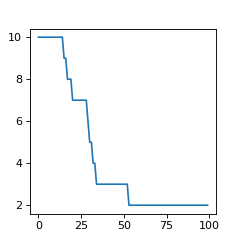

In [100]:
c = Const();
curve = model(c, show_dotses=True);
plt.figure(figsize=(3,3));
plt.plot(curve);